# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis with pandas. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [96]:
# Import the appropriate libraries with aliases

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create two new dataframes

north_df = pd.read_csv('NorthCallCenter.csv')
south_df = pd.read_csv('SouthCallCenter.csv')

print(north_df.head())
print(south_df.head())

print(north_df.shape)
print(south_df.shape)


   Unnamed: 0 Branch     Call Purpose Time Block Incoming or Outgoing Queue  \
0           0  North        Complaint    9:00 AM             Incoming     B   
1           1  North    Sales Support   11:00 AM             Incoming     A   
2           2  North    Sales Support   11:00 AM             Incoming     B   
3           3  North    Sales Support    4:00 PM             Incoming     B   
4           4  North  Product Support   12:00 PM             Incoming     B   

  Rep ID Sale  Lost Call  Abandoned  Busy Minutes  Not Ready Minutes  \
0  Brent   NO          0          1             9                  2   
1    Cam   NO          0          0            11                  1   
2   Todd   NO          0          0             9                  3   
3  Brent   NO          0          0            11                  2   
4  Brent   NO          0          0             8                  2   

   Incoming Wait Time  During Call Wait Time  Calls  
0                 1.0                 

## Task 1: Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. Use the code blocks below to begin cleaning your data. At the end of the section, record your answers.

#### EDA Question 1A:  How many reps are in the North branch?  

In [97]:
# EDA Question 1A solution below:

n_reps_count = north_df['Rep ID'].nunique()

print(n_reps_count)

# A: 9

9


#### EDA Question 1B:  How many reps are in the South branch?  

In [98]:
# EDA Question 1B solution Below:

s_reps_count = south_df['Rep ID'].nunique()

print(s_reps_count)

11


#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [99]:
# EDA Question 2A solution Below:

n_means = north_df.agg({
    'Busy Minutes': 'mean', 
    'Not Ready Minutes': 'mean', 
    'Incoming Wait Time': 'mean', 
    'During Call Wait Time': 'mean'
    })

print(n_means)

Busy Minutes             9.987755
Not Ready Minutes        1.914286
Incoming Wait Time       3.048780
During Call Wait Time    2.967347
dtype: float64


#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [100]:
# EDA Question 2B solution Below:

s_means = south_df.agg({
    'Busy Minutes': 'mean', 
    'Not Ready Minutes': 'mean', 
    'Incoming Wait Time': 'mean', 
    'During Call Wait Time': 'mean'
    })

print(s_means)

Busy Minutes             10.054140
Not Ready Minutes         1.910828
Incoming Wait Time        3.000000
During Call Wait Time     3.076433
dtype: float64


#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [101]:
# EDA Question 3 solution Below:

n_s_combined = pd.concat([north_df, south_df])

n_s_grouped_time = n_s_combined.groupby('Time Block')

n_s_calls_per_time = n_s_grouped_time['Calls'].count()

print(n_s_calls_per_time)

Time Block
10:00 AM     99
11:00 AM     56
12:00 PM    120
1:00 PM      40
2:00 PM      65
3:00 PM      73
4:00 PM      53
5:00 PM      43
9:00 AM      10
Name: Calls, dtype: int64


##### Record your answers for the EDA section below:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11 


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.99
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.05
> - During Call Wait Time = 2.97
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.00
> - During Call Wait Time = 3.08
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 99
> - 10:00AM  = 56
> - 11:00AM  = 120 
> - 12:00PM  = 40
> - 1:00PM   = 65
> - 2:00PM   = 73
> - 3:00PM   = 53
> - 4:00PM   = 43
> - 5:00PM   = 10



## Task 2: Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?

In [102]:
# Question 1 solution below

n_nulls = north_df.isnull()

print(n_nulls)

sum_n_nulls = n_nulls.sum()

print(sum_n_nulls)

# it appears that there's 163 nulls in the Incoming Wait Time column of the North Call Center dataframe.  

s_nulls = south_df.isnull()

print(s_nulls)

sum_s_nulls = s_nulls.sum()

print(sum_s_nulls)

# it appears that there's 188 nulls in the Incoming Wait Time column of the South Call Center dataframe. 

# Are calls that got picked up immediately (i.e. had a 0 minute wait time) nulls, or are 0s actually
# recorded in the column? 

n_incoming_values = north_df['Incoming Wait Time'].unique()

print(n_incoming_values)

# it looks like there are no 0s (i.e. immediate answers) recorded, which tells me that perhaps all the
# cells that are null were actually calls with a 0-second wait time.  Could theoretically replace all
# the nulls with 0s if we're confident in that assessment and having numeric values in those cells
# would aid analysis.  Maybe it's just not possible for a call to be answered in 0 seconds, though? 

     Unnamed: 0  Branch  Call Purpose  Time Block  Incoming or Outgoing  \
0         False   False         False       False                 False   
1         False   False         False       False                 False   
2         False   False         False       False                 False   
3         False   False         False       False                 False   
4         False   False         False       False                 False   
..          ...     ...           ...         ...                   ...   
240       False   False         False       False                 False   
241       False   False         False       False                 False   
242       False   False         False       False                 False   
243       False   False         False       False                 False   
244       False   False         False       False                 False   

     Queue  Rep ID   Sale  Lost Call  Abandoned  Busy Minutes  \
0    False   False  False      Fal

#### Record your answer below:

> Your Answer: Are calls that got picked up immediately (i.e. had a 0 minute wait time) nulls, or are 0s actually
recorded in the column?  It looks like there are no 0s (i.e. immediate answers) recorded, which tells me that perhaps 
all the cells that are null were actually calls with a 0-minute wait time.  Could theoretically replace all the nulls 
with 0s if we're confident in that assessment and having numeric values in those cells would aid analysis. 

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?

In [103]:
# Cleaning Question 2 solution below:

print(north_df['Sale'])

print(north_df['Sale'].unique())

# One of the "YES" values has a trailling whitespace.  The other doesn't.  The trailing whitespace
# needs to be removed 

north_df['Sale'] = north_df['Sale'].str.strip()

print(north_df['Sale'].unique())

# Looks like this worked! 


0      NO
1      NO
2      NO
3      NO
4      NO
       ..
240    NO
241    NO
242    NO
243    NO
244    NO
Name: Sale, Length: 245, dtype: object
['NO' 'YES ' 'YES']
['NO' 'YES']


##### Record your answer by below:
> Your Answer: There was one "YES" with a trailing white space, one without.  str.strip() removed the trailing
whitespace and doing ['Sale'] = ['Sale'].str.strip() updated the column in the dataframe.  

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?

In [104]:
# Cleaning Question 3 solution below:

n_dupes = north_df.duplicated()

print(n_dupes)

print(n_dupes.unique())

s_dupes = south_df.duplicated()

print(s_dupes)

print(s_dupes.unique())


0      False
1      False
2      False
3      False
4      False
       ...  
240    False
241    False
242    False
243    False
244    False
Length: 245, dtype: bool
[False]
0      False
1      False
2      False
3      False
4      False
       ...  
309    False
310    False
311    False
312    False
313    False
Length: 314, dtype: bool
[False]


##### Record your answer below:
> Your Answer: .duplicated().unique() only shows False, which to me says that there are no rows that are
duplicates, which would've returned a True.  

#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [105]:
# Cleaning Question 4 solution below: 

print(north_df['Incoming or Outgoing'].unique())

# So, there are both 'Incoming' and 'Outgoing' calls recorded.  I thought they might all be
# incoming and this column wouldn't be needed.  



['Incoming' 'Outgoing']


##### Record your answer below:
> Your Answer: Honestly, I tend to struggle with this type of question in exercises, studios, and this
project.  In this case, I struggle to see any columns that seem truly unncessary and could be dropped
with no adverse effects.  

## Task 3: Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer below.

In [106]:
# Create dataframe for the entire company named df

df = pd.concat([north_df, south_df])

print(df)

     Unnamed: 0 Branch     Call Purpose Time Block Incoming or Outgoing Queue  \
0             0  North        Complaint    9:00 AM             Incoming     B   
1             1  North    Sales Support   11:00 AM             Incoming     A   
2             2  North    Sales Support   11:00 AM             Incoming     B   
3             3  North    Sales Support    4:00 PM             Incoming     B   
4             4  North  Product Support   12:00 PM             Incoming     B   
..          ...    ...              ...        ...                  ...   ...   
309         309  South  Product Support    5:00 PM             Outgoing     D   
310         310  South  Product Support    5:00 PM             Outgoing     C   
311         311  South  Product Support    5:00 PM             Outgoing     C   
312         312  South  Product Support    5:00 PM             Outgoing     C   
313         313  South  Product Support    5:00 PM             Outgoing     D   

     Rep ID Sale  Lost Call

#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

In [107]:
# Manipulation Question solution below:

# df_grouped_reps = df.groupby('Rep ID') 

# df_group_rep_summed = df_grouped_reps['Calls'].sum()

# print(df_group_rep_summed)

# df_group_rep_summed_sorted = df_group_rep_summed.sort_values(ascending=False)

# print(df_group_rep_summed_sorted)

north_df_reps = north_df.groupby('Rep ID')
north_df_group_rep_summed = north_df_reps['Calls'].sum()
north_df_group_rep_summed_sorted = north_df_group_rep_summed.sort_values(ascending=False)

south_df_reps = south_df.groupby('Rep ID')
south_df_group_rep_summed = south_df_reps['Calls'].sum()
south_df_group_rep_summed_sorted = south_df_group_rep_summed.sort_values(ascending=False)

print(north_df_group_rep_summed_sorted)
print(south_df_group_rep_summed_sorted)

# Why did this question ask us to work from a combined dataframe but then get information for North
# and South call centers, respectively?  Should I have worked from the combined dataframe and sorted
# accordingly to get the desired result? 



Rep ID
Brent     37
Lilly     30
Todd      29
Duke      29
Joe       26
Xander    24
Cam       24
Amanda    23
Andy      23
Name: Calls, dtype: int64
Rep ID
Eric      35
Randy     33
Sandy     32
Helga     31
George    29
Kate      29
Karl      28
Susan     26
Josh      26
Sharon    25
Alice     20
Name: Calls, dtype: int64


##### Record your answer below
Rep with the hightest number of calls and their total calls:
- North Branch = Brent (37)
- South Branch = Eric (35)

#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?

In [108]:
# Manipulation Question 2 solution below:

n_abandoned_count = (north_df['Abandoned'] == 1).sum()
print(n_abandoned_count) 

n_call_count = north_df['Calls'].sum()
print(n_call_count)

print(n_abandoned_count / n_call_count)

# North call center has an Abandoned rate of 2.86%

# South call center 

s_call_count = south_df['Calls'].sum()
print(s_call_count)

s_abandoned_count = (south_df['Abandoned'] == 1).sum()
print(s_abandoned_count) 

print(s_abandoned_count / s_call_count)

# South call center has an Abandoned rate of 1.27%

# Whole company

df_call_count = df['Calls'].sum()

df_abandoned_count = (df['Abandoned'] == 1).sum()
print(df_abandoned_count)

print(df_abandoned_count / df_call_count)

# the whole company has an Abandoned rate of 1.97%

7
245
0.02857142857142857
314
4
0.012738853503184714
11
0.01967799642218247


##### Record your answer below:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.86%
- South Branch = 1.27%
- Company Wide = 1.97%
- Do any of these fall out of the optimal range of 2-5%? No.

#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?

In [175]:
# Manipulation Question 3 solution below: 
n_under_2 = north_df['Incoming Wait Time'].isin([1, 2]).sum()
print(n_under_2)

n_incoming_count = (north_df['Incoming or Outgoing'] == 'Incoming').sum()
print(n_incoming_count)

print (n_under_2 / n_incoming_count)

s_under_2 = south_df['Incoming Wait Time'].isin([1, 2]).sum()
print(s_under_2)

s_incoming_count = (south_df['Incoming or Outgoing'] == 'Incoming').sum()
print(s_incoming_count)

print (s_under_2 / s_incoming_count)

df_under_2 = df['Incoming Wait Time'].isin([1, 2]).sum()
print(df_under_2)

df_incoming_count = (df['Incoming or Outgoing'] == 'Incoming').sum()
print(df_incoming_count)

print (df_under_2 / df_incoming_count)

33
82
0.4024390243902439
48
126
0.38095238095238093
81
208
0.3894230769230769


##### Record your answer below:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 40.24% (33 calls)
- South Branch = 38.10% (48 calls)
- Company Wide = 38.94% (81 calls)

#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?

In [114]:
# Manipulation Question 4 solution below:

n_avg_spd = north_df.agg({'Incoming Wait Time': 'mean'})
print(n_avg_spd)

s_avg_spd = south_df.agg({'Incoming Wait Time': 'mean'})
print(s_avg_spd)

df_avg_spd = df.agg({'Incoming Wait Time': 'mean'})
print(df_avg_spd)

Incoming Wait Time    3.04878
dtype: float64
Incoming Wait Time    3.0
dtype: float64
Incoming Wait Time    3.019231
dtype: float64


##### Record your answer by below:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.05
- South Branch in seconds = 3.00
- Company Wide in seconds = 3.02

## Task 4: Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?

/var/folders/zf/cb3_1h9969d8z3n17n7d956r0000gn/T/ipykernel_19698/3373332886.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i]


{'A': np.float64(0.041666666666666664), 'B': np.float64(0.020134228187919462), 'C': np.float64(0.007246376811594203), 'D': np.float64(0.017045454545454544)}


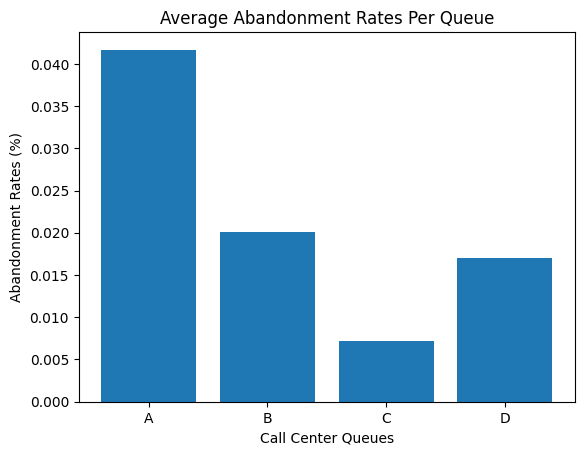

In [196]:
# Create visualization 1 here
# Import any additional libraries needed with alias

# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 

print(abandonment_rates)

#Your code below:

queues = abandonment_rates.keys()
rates = abandonment_rates.values()

# Gez it took me forever to figure out that it was necessary to get keys and values out of the
# abandonment_rates dictionary.  Should I have known how to do that?  I didn't find anything
# like that in the textbook, but maybe I'm just missing it.

plt.bar(queues, rates)
plt.xlabel('Call Center Queues')
plt.ylabel('Abandonment Rates (%)')
plt.title('Average Abandonment Rates Per Queue')
plt.show()


##### Record your answer below:

> Chart style you chose and why: Bar, because we're trying to visualize a comparison of different queues.

#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?

   Rep ID  Incoming Wait Time  Calls_x  Calls_y  Service Level %
0  Amanda            2.400000        3        5        60.000000
1    Andy            3.600000        3       10        30.000000
2   Brent            2.125000        6        8        75.000000
3     Cam            2.909091        5       11        45.454545
4    Duke            2.785714        6       14        42.857143
5     Joe            3.600000        2       10        20.000000
6   Lilly            3.083333        4       12        33.333333
7    Todd            3.500000        2        6        33.333333
8  Xander            3.333333        2        6        33.333333


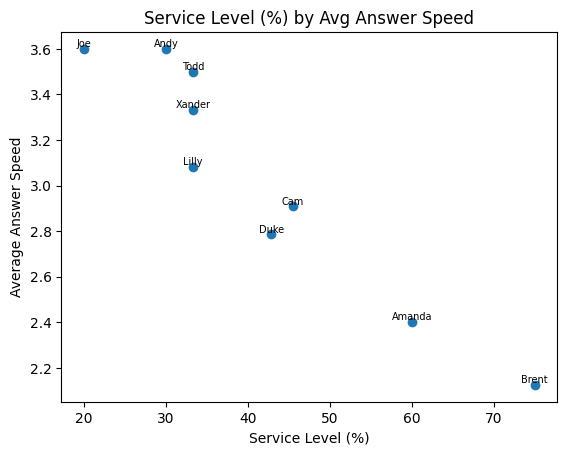

In [171]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

#Your Code Here:

# avg_spd_serv_lvl = pd.concat([north_plt, service_level])
# print(avg_spd_serv_lvl)

# concat() is not getting me the desired results... Looks like I need to set an index
# or somethign like that to make it work in this case? 

merged_data = pd.merge(north_plt, service_level, on="Rep ID")
print(merged_data)

x = merged_data['Service Level %']
y = merged_data['Incoming Wait Time']
rep_ids = merged_data['Rep ID']

plt.scatter(x, y)
for i, rep_id in enumerate(rep_ids):
    plt.text(x[i], y[i], rep_id, fontsize=7, ha='center', va='bottom')
plt.xlabel('Service Level (%)')
plt.ylabel('Average Answer Speed')
plt.title('Service Level (%) by Avg Answer Speed')
plt.show()


##### Record your answer below:

> Chart style you chose and why: I went with a scatterplot, because it seemed like we're trying to get
an understanding of the *relationship* between Incoming Wait Time and Service Level %.  The scatterplot 
appears to show that there is a positive correlation between reducing Incoming Wait Time and an increase
in Service Level %.

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?

          Complaints  Sales Support  Product Support
Incoming        51.0             75               82
Outgoing         NaN            123              228


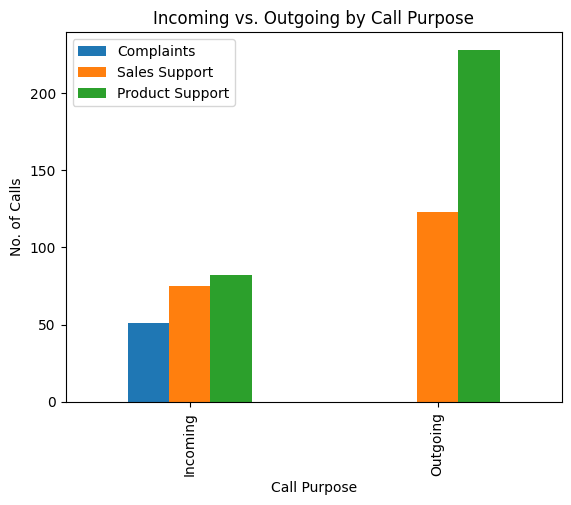

In [170]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
#print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

#Your Code Here:

# first step was realizing data couldn't be visualized directly from dictionaries

purpose_df = pd.DataFrame({
    'Complaints': complaints,
    'Sales Support': sales_support, 
    'Product Support': product_support
})

print(purpose_df)

purpose_df.plot(kind='bar')

plt.xlabel('Call Purpose')
plt.ylabel('No. of Calls')
plt.title('Incoming vs. Outgoing by Call Purpose')
plt.show()

# I suppose this is a somewhat helpful visualization.  I wanted it to have the 3 categories
# of calls along the x-axis, though, with an incoming and an outgoing bar for each category.


##### Record your answer below:

> Chart style you chose and why: Bar, because we're looking for a comparison again.  I'm not sure
how or why it automatically grouped things, but... I guess it's helpful.  

## Task 5: Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer below:
> Your Answer: The South branch handles more calls (314 vs. 245) and has an abandonment rate less than half of the North branch's (1.27% vs. 2.86%).  And it has nearly the same service level as the North branch (38.10% vs. 40.24%).  Other metrics, like Busy Minutes, Not Ready Minutes, Incoming Wait Time, and During Call Wait time were roughly equivalent between the two branches, with the South performing slightly better in some and the North slightly better in others.  So, overall, I'd say the South branch is operating *slightly* more efficiently than the North.  



#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer below:
> Your Answer: Based on the fact that they handle more calls than the North branch (28.54 calls/rep vs. 27.22 calls/rep) and are getting to their calls slightly less quickly (service level), it seems like the South branch could benefit slightly more from extra help.  I feel like this sort of contradicts my answer to Summary Question 1, though...


#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer below:
> Your Answer: Customer satisfaction ratings, call duration (could be helpful to guage rep activity - if they're on longer calls, other callers will likely be waiting longer), more historical data (does the South branch *routinely* get more calls than the North branch, or was that only true during this particular period?) come to mind. 


## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer below:

> Chart style you chose and why: 

Call Purpose  Complaint  Product Support  Sales Support
Time Block                                             
10:00 AM            6.0             20.0           73.0
11:00 AM            3.0             26.0           27.0
12:00 PM           11.0             60.0           49.0
1:00 PM             6.0             16.0           18.0
2:00 PM             5.0             50.0           10.0
3:00 PM             6.0             61.0            6.0
4:00 PM             3.0             40.0           10.0
5:00 PM             6.0             32.0            5.0
9:00 AM             5.0              5.0            NaN


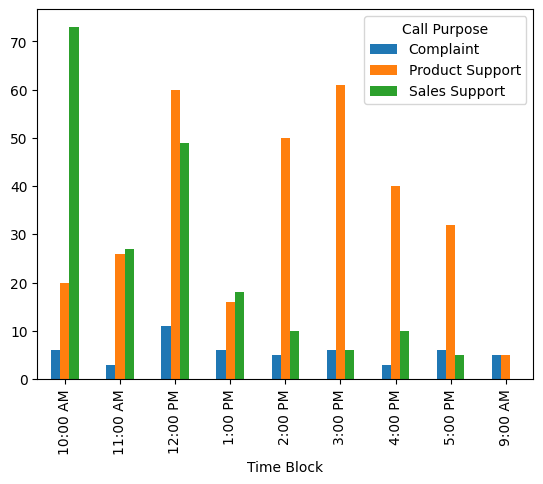

In [202]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

grouped_times = call_times.groupby(['Time Block', 'Call Purpose'])['Calls'].count().unstack()

# Took me so many iterations of this to figure out how to group correctly.  And it took me
# 10x as long as everything else to figure out that I needed .unstack() at the end to get the
# chart to group, and apparently color bars for different call purposes different colors (
# https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/)

print(grouped_times)

# Use groupby and get_group to select which call purpose to plot:

# getting data for the x-axis 
# complaints = grouped_times.xs('Complaint', level='Call Purpose')
# sales_support = grouped_times.xs('Sales Support', level='Call Purpose')
# product_support = grouped_times.xs('Product Support', level='Call Purpose')

# I tried get_group() specifically, but apparently xs() is what I need to use if I don't want to
# specify a time block but instead want to get data for *all* the time blocks? 

#getting data for the y-axis
# time_blocks = complaints.keys()
# complaint_counts = complaints.values

# Learned the need to do this back up on Visualization Question 1! 

# Took me a while to figure out I can't put () at the end of complaints.values
# I assume this is because I'm working with a series here, not a dictionary like
# I was in Visualization Question 1? 

grouped_times.plot(kind='bar')
plt.show()

# This is... something... I'd really like the bars that pertain to the same time block
# to all live closer together (i.e. be really *grouped*) and to make 
